In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
df['target']=iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [10]:
df[df.target==2].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df['FlowrName']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,FlowrName
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df[45:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,FlowrName
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [15]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]
df2.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,FlowrName
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


In [17]:
import matplotlib.pyplot as pt
%matplotlib inline

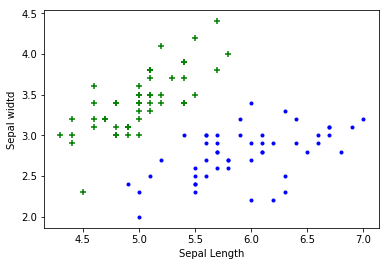

In [20]:
pt.xlabel('Sepal Length')
pt.ylabel('Sepal widtd')
pt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
pt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

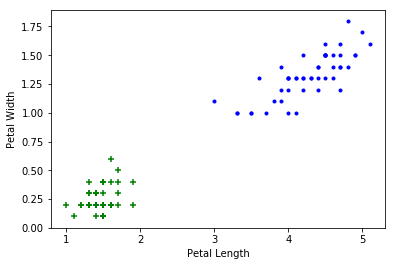

In [21]:
pt.xlabel('Petal Length')
pt.ylabel('Petal Width')
pt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
pt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [22]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(['target','FlowrName'],axis='columns')
Y=df.target

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [33]:
print(len(xtrain))
print(len(xtest))

120
30


In [35]:
from sklearn.svm import SVC
model=SVC()

In [36]:
model.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
model.score(xtrain,ytrain)

0.9833333333333333

In [38]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [40]:
modelc=SVC(C=1)
modelc.fit(xtrain,ytrain)
modelc.score(xtest,ytest)

1.0

In [41]:
modelc=SVC(C=10)
modelc.fit(xtrain,ytrain)
modelc.score(xtest,ytest)

0.9666666666666667

In [42]:
modelc=SVC(gamma=10)
modelc.fit(xtrain,ytrain)
modelc.score(xtest,ytest)

0.9666666666666667

In [43]:
modellinearkernal=SVC(kernel="linear")
modellinearkernal.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
modellinearkernal.score(xtest,ytest)

0.9666666666666667